In [2066]:
# Importing the libraries
from functions import *

## 1. HMM: Data preparation

In [2067]:
# Open XML file as a dataframe
input_file = '{}/databases/uniprot/curated_uniprot.fasta_75'.format(directory) # change the file name if necessary
df = blast_parser(input_file)
print(f"The number of instances: {len(df)}")
df.head(5)

The number of instances: 8656


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
0,Q16620,A0A2R9BM51,822,822,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,1,822,1,822,822,822,0,0.0,4458.0,200
1,Q16620,A0A4X2LP40,822,824,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,M SW + HGP MARL GFCWLV+ FWR + ACPTSC CS +RIWCS...,MLSWKKCHGPGMARLLGFCWLVLIFWRGSQACPTSCTCSTTRIWCS...,1,822,1,824,689,745,2,0.0,3749.0,200
2,Q16620,A0A4X2LDU8,822,822,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,M SW + HGP MARL GFCWLV+ FWR + ACPTSC CS +RIWCS...,MLSWKKCHGPGMARLLGFCWLVLIFWRGSQACPTSCTCSTTRIWCS...,1,822,1,821,689,745,1,0.0,3756.0,200
3,Q16620,A0A6P5IKH1,822,824,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,M SW + HGP MARL GFCWLV+ FWR + ACPTSC CS +RIWCS...,MLSWKKCHGPGMARLLGFCWLVLIFWRGSQACPTSCTCSTTRIWCS...,1,822,1,824,691,745,2,0.0,3764.0,200
4,Q16620,A0A7J7UQA2,822,741,TSCKCSASRIWCSDPSPGIVAFPRLEPNSVDPENITEIFIANQKRL...,+SCKCSASRIWCSDP PGI+AFPRLEPN++DPENITEI+IANQKRL...,SSCKCSASRIWCSDPIPGIMAFPRLEPNTIDPENITEIYIANQKRL...,34,774,2,739,710,724,3,0.0,3776.0,200


In [2068]:
# Create a dataframe with Disprot instances from curated.mjson database
data = list()

with open('curated.mjson', 'r') as file:
    for line in file:
        obj = json.loads(line)
        rows = json_parser(obj)
        data.extend(rows)

curated_disprot = pd.DataFrame(data)

# Calculate the length of disordered regions
curated_disprot['length'] = curated_disprot['end'] - curated_disprot['start'] + 1
curated_disprot = curated_disprot[(curated_disprot['feature'] == 'disorder') & (curated_disprot['source'] == 'disprot')]
curated_disprot.to_csv("curated_disprot.csv", index=False)

print(f"The number of instances in the Curated Disprot database: {len(curated_disprot)}")
curated_disprot.head()

The number of instances in the Curated Disprot database: 3151


,acc,evidence,feature,source,start,end,length
6927,P03265,curated,disorder,disprot,294,334,41
6928,P03265,curated,disorder,disprot,454,464,11
6929,P49913,curated,disorder,disprot,134,170,37
6930,P03045,curated,disorder,disprot,1,107,107
6931,P00004,curated,disorder,disprot,1,105,105


In [2069]:
# Keep only disordered regions in the initial dataframe filtering with curated_disordered dataframe
disordered = df[df['query_id'].isin(curated_disprot['acc'])]
disordered.to_csv("disordered_df.csv", index=False)

print(f"The number of rows with the disordered regions: {len(disordered)}")
disordered.head(5)

The number of rows with the disordered regions: 2887


,query_id,subject_id,query_len,hsp_len,query_seq,match_seq,subject_seq,query_start,query_end,subject_start,subject_end,identity,positive,gaps,eval,bit_score,count
200,Q9H832,A0A6J2FM24,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
201,Q9H832,A0A3Q7W6Y2,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGA GPGAS VAGVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGATGPGASGVAGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
202,Q9H832,A0A2U3VK69,354,356,MAESPTEEAATA--GAGAAGPGASSVAGVVGVSGSGGGFGPPFLPD...,MAESPTEEAATA GAGAAGPGAS V GVVGVSGSG FGPPFLPD...,MAESPTEEAATATAGAGAAGPGASGVTGVVGVSGSG--FGPPFLPD...,1,354,1,354,350,350,4,0.0,1851.0,200
203,Q9H832,A0A2Y9JVH5,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200
204,Q9H832,A0A8C7ALE4,354,358,MAESPTEEAATA----GAGAAGPGASSVAGVVGVSGSGGGFGPPFL...,MAESPTEEAATA GAGAAGPGAS VAGVVGVSGSG FGPPFL...,MAESPTEEAATATATAGAGAAGPGASGVAGVVGVSGSG--FGPPFL...,1,354,1,356,351,351,6,0.0,1854.0,200


In [2070]:
# Define an array of disordered regions ids
disprot_ids = disordered["query_id"].unique()

# Dropdown list of Uniprot query IDs for disordered regions
output = widgets.Select(options=disprot_ids,
    rows=10,
    description='Uniprot ID: ',
    layout={'width': 'max-content'},
    disabled=False)

display(output)

Select(description='Uniprot ID: ', layout=Layout(width='max-content'), options=('Q9H832', 'Q8IW19', 'Q99967', …

In [2913]:
# Check if there are disordered regions for a particular query ID
id_dis = output.value
i = 1 # change to the necessary region
# store the data
%store id_dis i
selected_dis = disordered[disordered["query_id"].isin([id_dis])]
# selected_dis.head()

Stored 'id_dis' (str)
Stored 'i' (int)


In [2914]:
# Filter the curated_disprot dataframe based on selected ID
curated_query = curated_disprot[curated_disprot['acc'] == id_dis]
curated_query

,acc,evidence,feature,source,start,end,length
7821,Q86FP8,curated,disorder,disprot,20,80,61


## 2. hmmbuild
We build an HMM of each disordered region, using trimmed MSA as an input.

In [2915]:
# Set the paths to HMM and MSA files
hmm_file = f'{directory}/results/hmms/hmmbuild/{id_dis}.hmm'
align_file = f'{directory}/results/alignments/output_files/disordered/{id_dis}_{i}.fasta'

In [2916]:
# for id_dis in disprot_ids:
#     hmm_file = f'{directory}/results/hmms/hmmbuild/{id_dis}.hmm'
#     align_file = f'{directory}/results/alignments/output_files/disordered/{id_dis}_{i}.fasta'
#     print(hmm_file, align_file)

In [2917]:
# # Build HMM
# !hmmbuild {hmm_file} {align_file}

## 3. hmmsearch

After building the model, our objective is to assess if overlaps with the profiles in Reference Proteome 15% exist and to enrich the model by utilizing this database. We generate dataframes containing the most significant sequences, with a default E-value threshold of 0.01.

In [2918]:
# # Copy the HMM file to remote computer to perform HMM search on a cluster
# !scp {directory}/results/hmms/hmmbuild/{id_dis}_{i}.hmm {name}@{server}:~/{id_dis}_{i}.hmm

In [2919]:
# # hmmsearch against Reference Proteome 15%
# !ssh {name}@{server} "/software/packages/hmmer/hmmer-3.3.2/usr/bin/hmmsearch {id_dis}_{i}.hmm /db/rp/rp-seqs-15.fasta.gz > hmmsearch_rp_15_{id_dis}_{i}.txt"

In [2920]:
# # Copy results to the local folder
# !scp {name}@{server}:~/hmmsearch_rp_15_{id_dis}_{i}.txt {directory}/results/hmms/hmmsearch/

In [2921]:
# # Remove the files from the remote folder
# !ssh {name}@{server} "rm ~/{id_dis}_{i}.hmm"
# !ssh {name}@{server} "rm ~/hmmsearch_rp_15_{id_dis}_{i}.txt"

### 3.1 hmmsearch results preprocessing (for one alignment)

In [2922]:
# 1. Make a dataframe with the statistics - the first table of the hmmsearch output
stats_rp_15 = process_hmmsearch_file(f"{directory}/results/hmms/hmmsearch/hmmsearch_rp_15_{id_dis}_{i}.txt")
# stats_rp_15.to_csv(f"{directory}/results/hmms/hmmsearch/stats/stats_rp_15_{id_dis}_{i}.csv", index=False)
stats_rp_15[:10]

,E-value,score,bias,E-value,score,bias,exp,N,Sequence,Description
0,2.4e-20,81.8,0.0,5.2e-20,80.7,0.0,1.6,1,A9TSC0,A9TSC0_PHYPA^|^^|^Glutamine--fructose-6-phosphate
1,1.9e-18,75.8,0.0,3.9e-18,74.8,0.0,1.5,1,A0A384L621,A0A384L621_ARATH^|^^|^Glutamine--fructose-6-phosp
2,1.9e-18,75.8,0.0,3.9e-18,74.8,0.0,1.5,1,Q9LIP9,GFAT1_ARATH^|^^|^Glutamine--fructose-6-phosphate
3,2.1e-17,72.4,0.0,5.2e-17,71.1,0.0,1.6,1,A0A834T8N5,A0A834T8N5_9FABA^|^^|^Glutamine--fructose-6-phosp
4,2.5e-17,72.1,0.0,5.7e-17,71.0,0.0,1.6,1,A0A6A6KBW9,A0A6A6KBW9_HEVBR^|^^|^Glutamine--fructose-6-phosp
5,2.9e-17,71.9,0.0,6.1e-17,70.9,0.0,1.5,1,A0A6A6KE75,A0A6A6KE75_HEVBR^|^^|^Glutamine--fructose-6-phosp
6,9e-17,70.4,0.0,1.7e-16,69.5,0.0,1.4,1,A0A4S4DXI9,A0A4S4DXI9_CAMSI^|^^|^Glutamine--fructose-6-phosp
7,1.3e-16,69.8,0.0,4.1e-16,68.3,0.0,1.8,1,A0A7I4BWS3,A0A7I4BWS3_PHYPA^|^^|^Glutamine--fructose-6-phosp
8,1.4e-16,69.8,0.0,2.6e-16,68.9,0.0,1.4,1,A0A2I0B5M1,A0A2I0B5M1_9ASPA^|^^|^Glutamine--fructose-6-phosp
9,1.5e-16,69.6,0.0,4.7e-16,68.1,0.0,1.8,1,A0A7I4BLY8,A0A7I4BLY8_PHYPA^|^^|^Glutamine--fructose-6-phosp


In [2923]:
# 2. Create a dataframe with the extracted regions from HMM - from the rest of the file
hmm_result_file = f"{directory}/results/hmms/hmmsearch/hmmsearch_rp_15_{id_dis}_{i}.txt"
hmmsearch_regions = extract_table_from_output(hmm_result_file)
# hmmsearch_regions.to_csv(f"{directory}/results/hmms/hmmsearch/stats/stats_rp_15_regions_{id_dis}_{i}.csv")
hmmsearch_regions[:10]

,id,hmm_from,hmm_to,hmm_length
0,A9TSC0,11,61,51
1,A0A384L621,6,59,54
2,Q9LIP9,6,59,54
3,A0A834T8N5,10,59,50
4,A0A6A6KBW9,7,59,53
5,A0A6A6KE75,7,59,53
6,A0A4S4DXI9,10,59,50
7,A0A7I4BWS3,11,59,49
8,A0A2I0B5M1,5,59,55
9,A0A7I4BLY8,11,59,49


In [2924]:
# 3. Combine the results into a dataframe and save the file
hmmsearch_results = pd.merge(stats_rp_15, hmmsearch_regions, left_on="Sequence", right_on="id", how="inner")
hmmsearch_results = hmmsearch_results.drop(columns=["Description", "id"])
hmmsearch_results['hmm_from'] = hmmsearch_results['hmm_from'].astype(int)
hmmsearch_results['hmm_to'] = hmmsearch_results['hmm_to'].astype(int)
hmmsearch_results['hmm_length'] = hmmsearch_results['hmm_length'].astype(int)
hmmsearch_results.to_csv(f"{directory}/results/hmms/hmmsearch/stats/stats_rp_15_{id_dis}_{i}.csv", index=False)
print(f"Number of hmmsearch hits for the {i} disordered region of the {id_dis} protein:", len(hmmsearch_results))
%store hmmsearch_results
hmmsearch_results[:10]

Number of hmmsearch hits for the 1 disordered region of the Q86FP8 protein: 295
Stored 'hmmsearch_results' (DataFrame)


,E-value,score,bias,E-value,score,bias,exp,N,Sequence,hmm_from,hmm_to,hmm_length
0,2.4e-20,81.8,0.0,5.2e-20,80.7,0.0,1.6,1,A9TSC0,11,61,51
1,1.9e-18,75.8,0.0,3.9e-18,74.8,0.0,1.5,1,A0A384L621,6,59,54
2,1.9e-18,75.8,0.0,3.9e-18,74.8,0.0,1.5,1,Q9LIP9,6,59,54
3,2.1e-17,72.4,0.0,5.2e-17,71.1,0.0,1.6,1,A0A834T8N5,10,59,50
4,2.5e-17,72.1,0.0,5.7e-17,71.0,0.0,1.6,1,A0A6A6KBW9,7,59,53
5,2.9e-17,71.9,0.0,6.1e-17,70.9,0.0,1.5,1,A0A6A6KE75,7,59,53
6,9e-17,70.4,0.0,1.7e-16,69.5,0.0,1.4,1,A0A4S4DXI9,10,59,50
7,1.3e-16,69.8,0.0,4.1e-16,68.3,0.0,1.8,1,A0A7I4BWS3,11,59,49
8,1.4e-16,69.8,0.0,2.6e-16,68.9,0.0,1.4,1,A0A2I0B5M1,5,59,55
9,1.5e-16,69.6,0.0,4.7e-16,68.1,0.0,1.8,1,A0A7I4BLY8,11,59,49


### 3.2 hmmsearch results preprocessing (overall)

In [2925]:
# # Combine hmmsearch results for all ids in disprot_ids array
# hmmsearch_path = f'{directory}/results/hmms/hmmsearch/stats' # set the path to the files with hmmsearch statistics
# dataframes = []

# for filename in os.listdir(hmmsearch_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(hmmsearch_path, filename)
#         df = pd.read_csv(file_path, sep=',')
#         dataframes.append(df)

# # Merge the files
# hmmsearch_combined = pd.concat(dataframes, ignore_index=True)
# hmmsearch_combined = hmmsearch_combined.iloc[:, 1:]
# hmmsearch_combined = hmmsearch_combined.dropna(axis=0)
# hmmsearch_combined.to_csv('results/hmms/hmmsearch/hmmsearch_combined.csv', index=False)
# hmmsearch_combined

In [2926]:
# # Combine all hmmsearch results
# # hmmsearch_path = f'{directory}/results/hmms/hmmsearch/stats'
# dataframes = []

# for filename in os.listdir(hmmsearch_path):
#     if filename.startswith('stats_rp_15_regions') and filename.endswith('.csv'):
#         file_path = os.path.join(hmmsearch_path, filename)
#         df = pd.read_csv(file_path)
#         dataframes.append(df)
        
# combined_data = pd.concat(dataframes, ignore_index=True)
# combined_data = combined_data.iloc[:, 1:]
# duplicates = combined_data[combined_data[['id', 'hmm_length']].duplicated(keep='first')]
# combined_data.drop(duplicates.index, inplace=True)
# combined_data.to_csv('results/hmms/hmmsearch/combined_data.csv', index=False)
# combined_data

In [2927]:
# # Extract the list of unique Uniprot Ids
# unique_ids = combined_data['id'].unique()
# unique_ids_df = pd.DataFrame({'id': unique_ids})
# unique_ids_df.to_csv('unique_ids.csv', index=False)

These Uniprot IDs are used in extracting the Pfam regions from Interpro.

## 4. Pfam
### 4.1 Pfam results preprocessing (for one alignment)

In [2928]:
# # Copy again the new file to the remote computer
# !scp {directory}/results/hmms/hmmsearch/stats/stats_rp_15_{id_dis}_{i}.csv {name}@{server}:~/stats_rp_15_{id_dis}_{i}.csv

In [2929]:
# # Check the overlap of the retrieved regions in RP with protein2ipr database
# !ssh {name}@{server} "/home/alina/protein2ipr_iterator.py stats_rp_15_{id_dis}_{i}.csv /db/interpro/protein2ipr.dat.gz protein2ipr_rp_15_{id_dis}_{i}.txt"

In [2930]:
# # Copy the files with overlapping regions to the local folder
# !scp {name}@{server}:~/protein2ipr_rp_15_{id_dis}_{i}.txt {directory}/results/hmms/hmmsearch/protein2ipr

In [2931]:
# # Remove the files from the remote folder
# !ssh {name}@{server} "rm ~/stats_rp_15_{id_dis}_{i}.csv"

In [2932]:
# Filter only entries with Pfam ID and intercepting regions with the curated_disprot instances
filename = f"{directory}/results/hmms/hmmsearch/protein2ipr/protein2ipr_rp_15_{id_dis}_{i}.txt"
pfam = read_and_filter_pfam_data(filename, curated_query) # adding filtering by "PF" in "pfam_id" column
# if len(pfam) != 0: # if there exists an overlap of hmmsearch results and pfam
#     pfam.to_csv(f"results/pfam/pfam_overlap/pfam_overlap_{id_dis}.csv", index=False)
print(f"The number of overlapping entries with Pfam instances for the {id_dis} protein: {len(pfam)}")
pfam.head()

The number of overlapping entries with Pfam instances for the Q86FP8 protein: 569


,uniprot_id,ipr_id,description,pfam_id,start_pfam,end_pfam,length_pfam
0,A0A016UWB3,IPR001347,SIS domain,PF01380,173,300,128
1,A0A016UWB3,IPR001347,SIS domain,PF01380,343,431,89
2,A0A016UWX5,IPR001347,SIS domain,PF01380,202,329,128
3,A0A016UWX5,IPR001347,SIS domain,PF01380,372,460,89
4,A0A059LFS6,IPR001347,SIS domain,PF01380,156,282,127


In [2933]:
# Merge with hmmsearch result (for one MSA)
pfam_overlap = pd.merge(pfam, hmmsearch_results[['Sequence', 'hmm_from', 'hmm_to', 'hmm_length']], left_on='uniprot_id', right_on='Sequence', how='left')
pfam_overlap = pfam_overlap.dropna(axis=0)
pfam_overlap['hmm_from'] = pfam_overlap['hmm_from'].astype(int)
pfam_overlap['hmm_to'] = pfam_overlap['hmm_to'].astype(int)
pfam_overlap['hmm_length'] = pfam_overlap['hmm_length'].astype(int)
pfam_overlap = pfam_overlap.drop(columns='uniprot_id')
# pfam_overlap.to_csv(f'results/pfam/pfam_overlap/pfam_overlap_{id_dis}.csv', index=False)
print(len(pfam_overlap))
pfam_overlap

569


,ipr_id,description,pfam_id,start_pfam,end_pfam,length_pfam,Sequence,hmm_from,hmm_to,hmm_length
0,IPR001347,SIS domain,PF01380,173,300,128,A0A016UWB3,5,56,52
1,IPR001347,SIS domain,PF01380,343,431,89,A0A016UWB3,5,56,52
2,IPR001347,SIS domain,PF01380,202,329,128,A0A016UWX5,5,56,52
3,IPR001347,SIS domain,PF01380,372,460,89,A0A016UWX5,5,56,52
4,IPR001347,SIS domain,PF01380,156,282,127,A0A059LFS6,13,61,49
...,...,...,...,...,...,...,...,...,...,...
564,IPR001347,SIS domain,PF01380,548,679,132,W1NP59,11,59,49
565,IPR001347,SIS domain,PF01380,382,509,128,W3XPE1,24,56,33
566,IPR001347,SIS domain,PF01380,554,683,130,W3XPE1,24,56,33
567,IPR001347,SIS domain,PF01380,377,504,128,W7HQ00,8,56,49


In [2934]:
# Calculate the overlaps
def calculate_overlap_percentage(row_pfam, row_disprot):
    start_pfam = row_pfam['start_pfam']
    end_pfam = row_pfam['end_pfam']
    start_disprot = row_disprot['start']
    end_disprot = row_disprot['end']
    disprot_length = end_disprot - start_disprot + 1

    overlap_length = min(end_pfam, end_disprot) - max(start_pfam, start_disprot) + 1
    
    if overlap_length > 0:
        percentage_overlap = (overlap_length / disprot_length) * 100
        return percentage_overlap
    else:
        return 0

In [2935]:
# Iterate over rows in pfam_overlap and curated_query to calculate overlap percentage
overlap_percentages = []
for index_pfam, row_pfam in pfam_overlap.iterrows():
    # Find the corresponding row in curated_query based on a matching condition
    matching_rows = curated_query[(curated_query['acc'] == row_pfam['Sequence'])]
    if not matching_rows.empty:
        row_disprot = matching_rows.iloc[0]
        overlap_percentage = calculate_overlap_percentage(row_pfam, row_disprot)
        overlap_percentage = round(overlap_percentage, 2)
        overlap_percentages.append(overlap_percentage)
    else:
        overlap_percentages.append(0)

pfam_overlap['overlap'] = overlap_percentages
pfam_overlap.to_csv(f'results/pfam/pfam_overlap/pfam_overlap_{id_dis}.csv', index=False)
pfam_overlap

,ipr_id,description,pfam_id,start_pfam,end_pfam,length_pfam,Sequence,hmm_from,hmm_to,hmm_length,overlap
0,IPR001347,SIS domain,PF01380,173,300,128,A0A016UWB3,5,56,52,0
1,IPR001347,SIS domain,PF01380,343,431,89,A0A016UWB3,5,56,52,0
2,IPR001347,SIS domain,PF01380,202,329,128,A0A016UWX5,5,56,52,0
3,IPR001347,SIS domain,PF01380,372,460,89,A0A016UWX5,5,56,52,0
4,IPR001347,SIS domain,PF01380,156,282,127,A0A059LFS6,13,61,49,0
...,...,...,...,...,...,...,...,...,...,...,...
564,IPR001347,SIS domain,PF01380,548,679,132,W1NP59,11,59,49,0
565,IPR001347,SIS domain,PF01380,382,509,128,W3XPE1,24,56,33,0
566,IPR001347,SIS domain,PF01380,554,683,130,W3XPE1,24,56,33,0
567,IPR001347,SIS domain,PF01380,377,504,128,W7HQ00,8,56,49,0


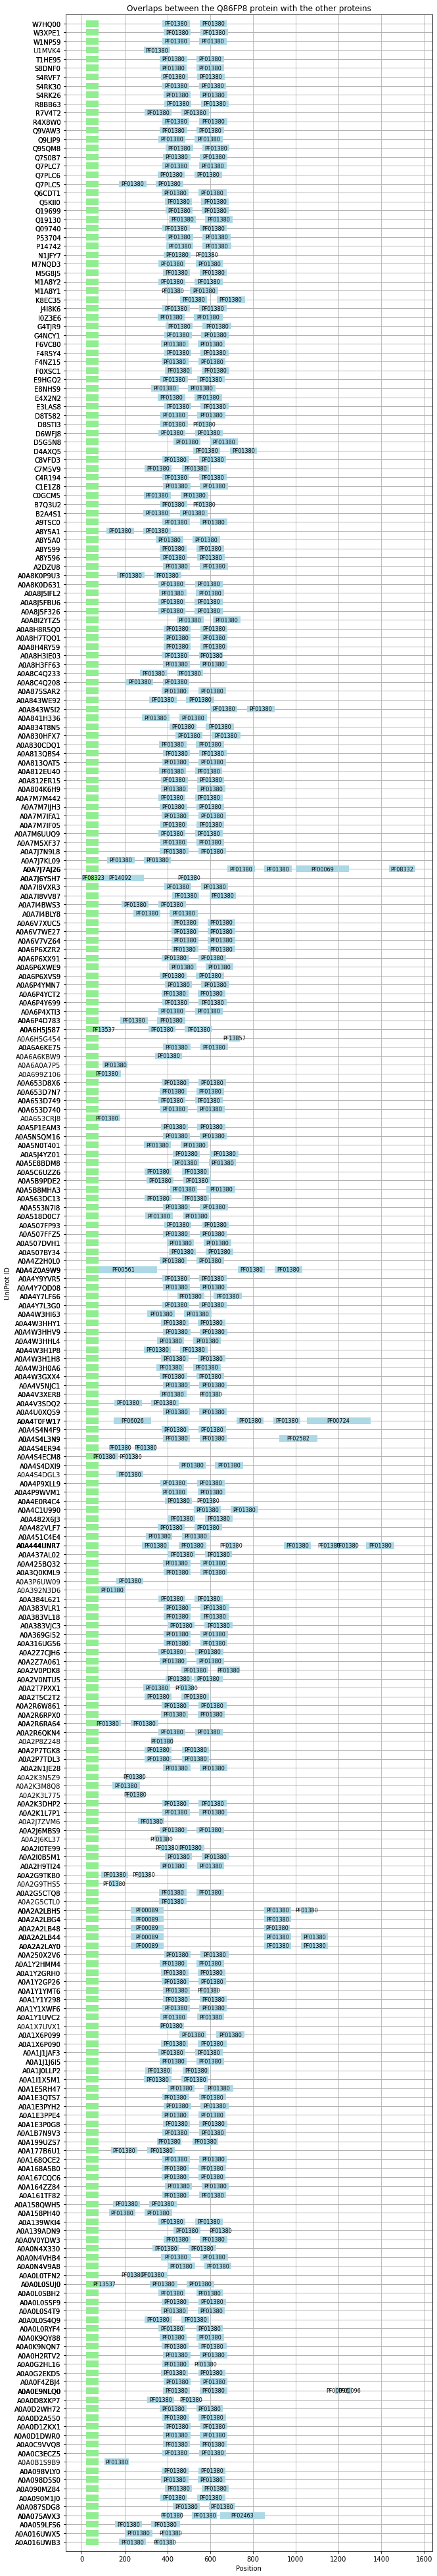

In [2936]:
def plot_overlapping_proteins(pfam_overlap, curated_query, id_dis, i):
    unique_uniprot_ids = pfam_overlap['Sequence'].unique()

    if len(unique_uniprot_ids) == 0:
        print("No overlapping regions to plot.")
        return

    # Plot overlapping regions
    fig, ax = plt.subplots(figsize=(10, 0.25 * len(unique_uniprot_ids)))

    # Plot the Pfam and DisProt regions
    ax.hlines(pfam_overlap['Sequence'], pfam_overlap['start_pfam'], pfam_overlap['end_pfam'], linewidth=10, color='lightblue', label='Pfam Region')
    if len(curated_query) == 1:
        ax.hlines(pfam_overlap['Sequence'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')
    else:
        ax.hlines(pfam_overlap['Sequence'], curated_query['start'].iloc[i], curated_query['end'].iloc[i], linewidth=10, color='lightgreen', label='Disprot Region')

    ax.set_yticks(pfam_overlap['Sequence'])
    ax.set_yticklabels(pfam_overlap['Sequence'])

    # Create a custom range for the y-axis based on the unique 'Sequence' values
    y_axis_range = range(len(unique_uniprot_ids))
    ax.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    
    # Add annotations at specific positions for Pfam regions
    for _, row in pfam_overlap.iterrows():
        x_pos = (row['start_pfam'] + row['end_pfam']) / 2  # Calculate the x position for annotation
        y_pos = row['Sequence']  # Use the 'uniprot_id' as the y position
        ax.annotate(row['pfam_id'], (x_pos, y_pos), ha='center', va='center', fontsize=8)
    
    plt.title(f'Overlaps between the {id_dis} protein with the other proteins')
    plt.xlabel('Position')
    plt.ylabel('UniProt ID')
#     plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

plot_overlapping_proteins(pfam_overlap, curated_query, id_dis, 1) # instead of i we can use 0, 1, 2

### 4.2 Pfam results preprocessing (overall)

In [2937]:
# # Combine all pfam results
# pfam_path = f'{directory}/results/pfam/pfam_overlap'
# dataframes = []

# for filename in os.listdir(pfam_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(pfam_path, filename)
#         df = pd.read_csv(file_path)
#         dataframes.append(df)
        
# pfam_combined = pd.concat(dataframes, ignore_index=True)
# pfam_combined.to_csv('results/pfam/pfam_combined.csv', index=False)
# # print(pfam_combined['Sequence'].unique())
# pfam_combined

In [2938]:
# Combine all pfam results
pfam_path = f'{directory}/results/pfam/pfam_overlap'
dataframes = []

for filename in os.listdir(pfam_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(pfam_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)
        
pfam_hmm = pd.concat(dataframes, ignore_index=True)
pfam_hmm.to_csv('results/pfam/pfam_hmm.csv', index=False)
# print(pfam_hmm['Sequence'].unique())
pfam_hmm

,ipr_id,description,pfam_id,start_pfam,end_pfam,length_pfam,Sequence,hmm_from,hmm_to,hmm_length,overlap
0,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,375,400,26,A0A2K5VR45,1,22,22,0.0
1,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,439,22,A0A2K5VR45,1,22,22,0.0
2,IPR041388,"PNK, FHA domain",PF17913,20,99,80,A0A2K5VR45,1,22,22,0.0
3,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,365,390,26,A0A2K6T215,1,22,22,0.0
4,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,407,429,23,A0A2K6T215,1,22,22,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1814,IPR003892,Ubiquitin system component CUE,PF02845,236,276,41,V4A7B4,7,50,44,0.0
1815,IPR000008,C2 domain,PF00168,86,187,102,V8NJ04,1,53,53,0.0
1816,IPR003892,Ubiquitin system component CUE,PF02845,263,302,40,V8NJ04,1,53,53,0.0
1817,IPR000008,C2 domain,PF00168,65,166,102,W4Z0N8,1,48,48,0.0


In [2939]:
# # Dataframe of HMM and Pfam instances
# pfam_hmm = pd.merge(pfam_combined, hmmsearch_combined[['Sequence', 'hmm_from', 'hmm_to', 'hmm_length']], left_on='uniprot_id', right_on='Sequence', how='left')
# pfam_hmm = pfam_hmm.dropna(axis=0)
# pfam_hmm = pfam_hmm.drop(columns='uniprot_id')
# pfam_hmm.to_csv('results/pfam/pfam_hmm.csv', index=False)
# print(len(pfam_hmm))
# pfam_hmm.head()

In [2940]:
# pfam_hmm.drop_duplicates(subset=['pfam_id', 'start_pfam', 'end_pfam', 'Sequence', 'hmm_from', 'hmm_to'], keep='first', inplace=True)
# print(len(pfam_hmm))
# pfam_hmm
# # pfam_hmm[pfam_hmm['Sequence'] == 'A0A2G8JLS5']

In [2950]:
# pfam_combined['hmm_from'].unique()

In [2949]:
pfam_disprot_overlap = pfam_hmm[pfam_hmm['overlap'] != 0]
print("The number of instances intercepting with Pfam:", len(pfam_disprot_overlap))
print("Overall number of instances:", len(pfam_hmm))
pfam_disprot_overlap

The number of instances intercepting with Pfam: 9
Overall number of instances: 1819


,ipr_id,description,pfam_id,start_pfam,end_pfam,length_pfam,Sequence,hmm_from,hmm_to,hmm_length,overlap
11,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,376,401,26,Q8IW19,1,22,22,13.64
12,IPR019406,"Aprataxin and PNK-like factor, PBZ domain",PF10283,418,442,25,Q8IW19,1,22,22,13.64
164,IPR018619,Hyccin,PF09790,23,330,308,Q9BYI3,1,105,105,100.0
177,IPR007576,CITED,PF04487,1,270,270,Q99967,1,50,50,100.0
525,IPR013106,Immunoglobulin V-set domain,PF07686,30,122,93,Q8R464,1,96,96,94.79
623,IPR031943,"CARMIL, C-terminal domain",PF16000,786,1079,294,Q5VZK9,1,16,16,100.0
1053,IPR004018,RPEL repeat,PF02755,61,83,23,Q8K4J6,1,32,32,53.12
1693,IPR031588,Collectrin domain,PF16959,617,770,154,Q9BYF1,1,37,37,5.41
1800,IPR000008,C2 domain,PF00168,53,154,102,Q9H0E2,1,53,53,1.89
